In [1]:
#In this kernel, we compare linear regression, polynomial regression, decision tree regression and random forest regression models from orthopedic patients'data.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('column_2C_weka.csv')


In [4]:
#Analysing the data

#First of all let's look at our dataset:

data.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
#We can see 310 patients'orthopedic values are used in this dataset. And their overall status is classified as normal or abnormal.


In [7]:
data['class'].value_counts()


Abnormal    210
Normal      100
Name: class, dtype: int64

In [8]:
#Lets see the statistics of the each feature:

d_stat = data.describe()
d_stat


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [9]:
#In order to see the correlation between the features we can use:

data.corr()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [10]:
#Features closer to 1 are more correlated with the other. From the correlation analysis, we can say pelvic incidence and sacral slope are related, because of high correlation value (0.81).


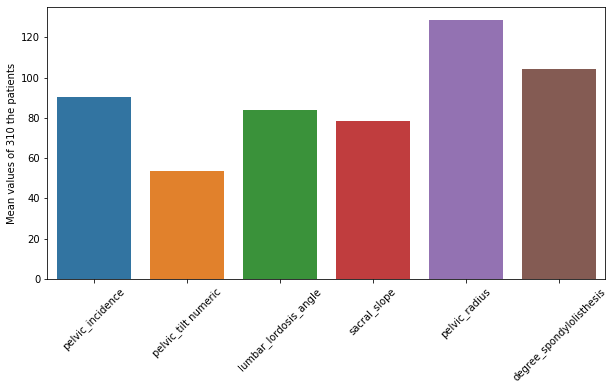

In [11]:
#Now lets visualize our 310 patients' mean orthopedic status:

x_names = list(d_stat.columns) # Using the columns for the each orthopedic status'names.
y_values = list(d_stat.mean()) # Using the mean values for the each feature.
plt.figure(figsize=(10,5))
sns.barplot(x=x_names, y=y_values)
plt.xticks(rotation=45)
plt.ylabel('Mean values of 310 the patients')
plt.show()


In [12]:
#Regression Analysis

#We will be using only two features 'sacral slope' and 'pelvic incidence' which are higly correlated. And filter only abnormal patients.


In [13]:
# Filtering only abnormal patients:
d_new = data[data['class'] == 'Abnormal']


In [14]:
# Our graphics x will be pelvic incidence and y will be sacral slope values:
x = np.array(d_new.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(d_new.loc[:, 'sacral_slope']).reshape(-1,1)


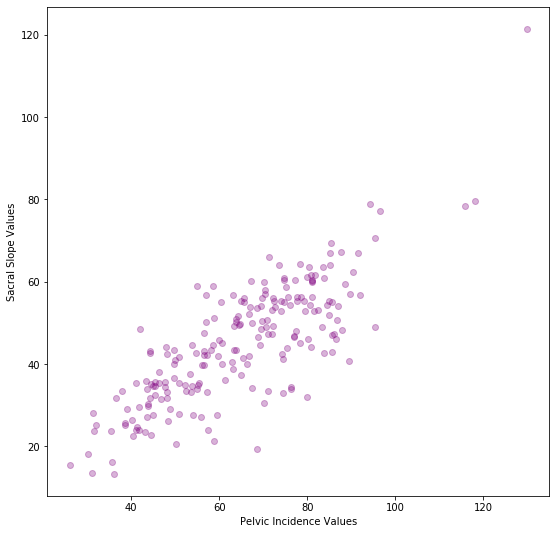

In [15]:
# Now visualize the values:
plt.figure(figsize=(9,9))
plt.scatter(x=x, y=y, color='purple', alpha=0.3)
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.show()


In [16]:
#From the graph above, we can see when pelvic incidence value is high, sacral slope value of the patient is high as well. Now lets make a linear regression model for our data.


In [17]:
#Linear Regression

#Let's import sklearn linear regression library and then create our linear regression model based on x and y features which are pelvic incidence and sacral slope values.


In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

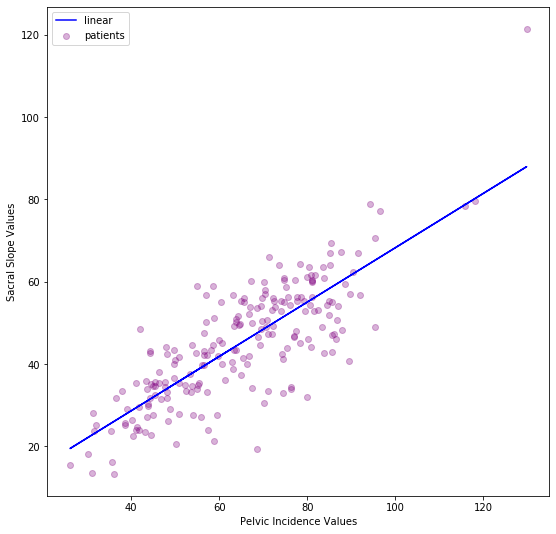

In [19]:
# Predicting new y values from our data's x values:
y_head = lr.predict(x)

plt.figure(figsize=(9,9))
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x, y_head, color='blue', label='linear')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()


In [20]:
#Question: What is the sacral slope value of a patient with a pelvic incidence value of 110?

#As you can see from the graph above, we don't have a patient with a 110 pelvic incidence status. From our model we want the computer to guess the result.

print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr.predict([[110]]))


Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[74.82568534]]


In [21]:
#So we created a linear regression model and we can predict sacral slope values from given pelvic incidence values. But how can we know that our model is good enough? In order to see our models correction, we have to evaluate r square score value of our model.

from sklearn.metrics import r2_score
print('Our models r square score is: ', r2_score(y, y_head))


Our models r square score is:  0.6458410481075871


In [22]:
#Model is working better as the r square score value reaches to 1. Our model's r square score value is 0.64 which is not that great. Now we can try another model like polynomial linear regression.


In [23]:
#Polynomial Linear Regression


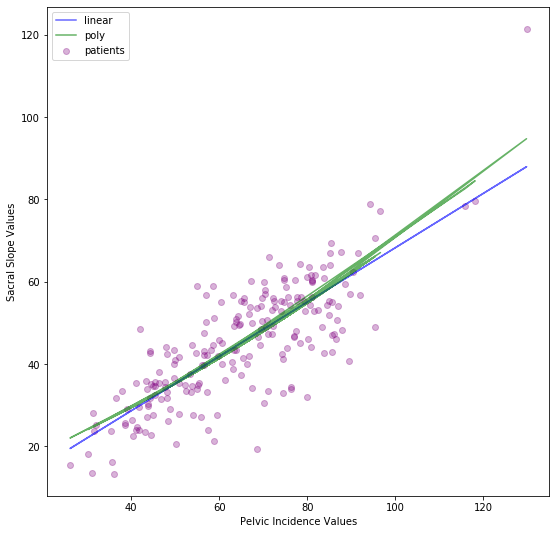

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

x_poly = poly.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(x_poly, y)
y_head2 = lr2.predict(x_poly)
plt.figure(figsize=(9,9))
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x, y_head, color='blue', alpha=0.6, label='linear')
plt.plot(x, y_head2, color='green', alpha=0.6, label='poly')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()


In [25]:
#Now let's ask the same question to the computer. And compare the results by linear and polynomial models.


In [26]:
# Polynomial Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr2.predict([[1,110,12100]]))

# Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr.predict([[110]]))


Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[77.69066724]]
Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[74.82568534]]


In [27]:
#If we compare our linear regression and polynomial regression model rˆ2 score values:

from sklearn.metrics import r2_score
print('Our linear models r square score is: ', r2_score(y, y_head))
print('Our polynomial models r square score is: ', r2_score(y, y_head2))


Our linear models r square score is:  0.6458410481075871
Our polynomial models r square score is:  0.6492426719559785


In [28]:
#Polynomial linear regression rˆ2 score is slightly greater (closer to 1) which is better.


In [29]:
#Decision Tree Linear Regression

#Now lets create our decision tree linear regression using the dataset. Then we can create a fitted graph. And finally we can predict the same value and compare the result with our previous models.


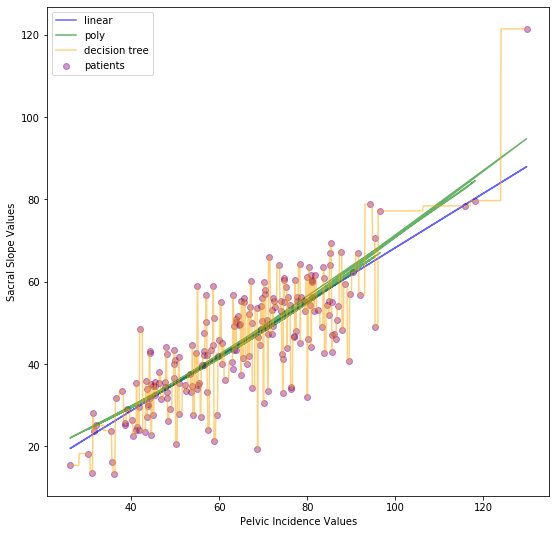

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(x,y)

x_tree = np.arange(min(x), max(x),0.1).reshape(-1,1)
y_tree = tree.predict(x_tree)
plt.figure(figsize=(9,9))
plt.scatter(x,y, color='purple', alpha=0.4, label='patients')
plt.plot(x, y_head, color='blue', alpha=0.6, label='linear') # Linear regression model fitted line
plt.plot(x, y_head2, color='green', alpha=0.6, label='poly') # Polynomial linear regression model fitted line
plt.plot(x_tree, y_tree, color='orange', alpha=0.5, label='decision tree') # Decision tree regression model fitted line
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()


In [31]:
#And now compare the same results for the three models:


In [32]:
# Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr.predict([[110]]))

# Polynomial Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr2.predict([[1,110,12100]]))

# Decision Tree Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', tree.predict([[110]]))


Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[74.82568534]]
Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[77.69066724]]
Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [78.40782459]


In [33]:
#Random Forest Regression


In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)

forest.fit(x,y)

x_for = np.arange(min(x), max(x),0.1).reshape(-1,1)
y_for = forest.predict(x_for)


C:\Users\mkellou\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


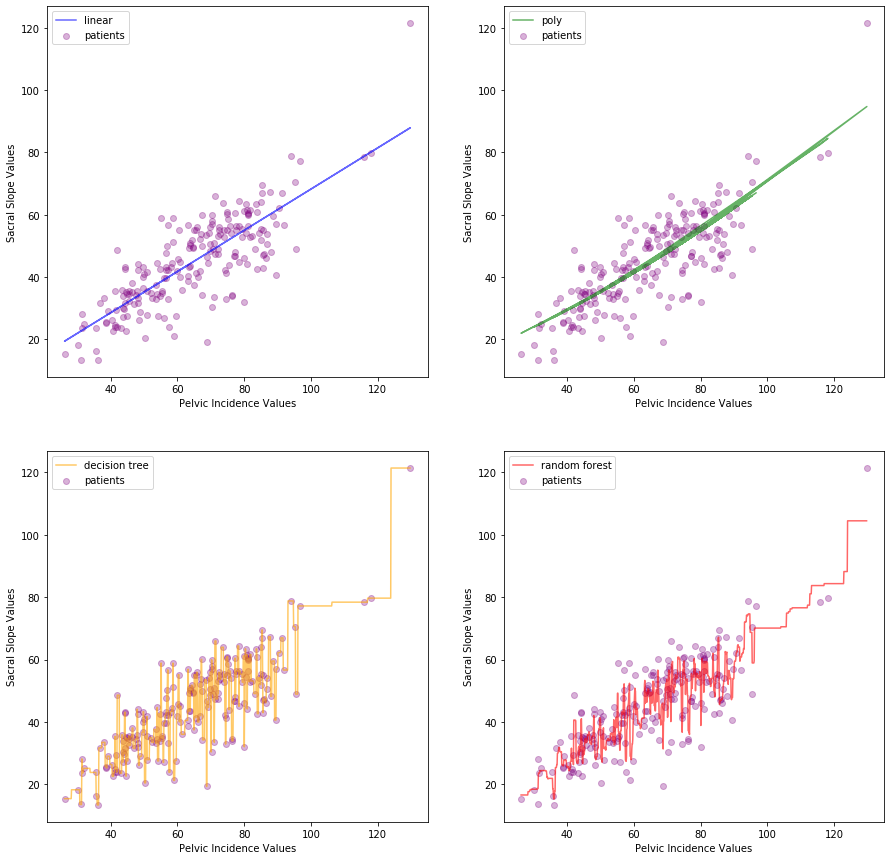

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x, y_head, color='blue', alpha=0.6, label='linear')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x, y_head2, color='green', alpha=0.6, label='poly')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x_tree, y_tree, color='orange', alpha=0.6, label='decision tree')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()

plt.subplot(2,2,4)
plt.scatter(x,y, color='purple', alpha=0.3, label='patients')
plt.plot(x_for, y_for, color='red', alpha=0.6, label='random forest')
plt.xlabel('Pelvic Incidence Values')
plt.ylabel('Sacral Slope Values')
plt.legend()
plt.show()


In [36]:
#Finally compare the results from the four models:


In [37]:
# Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr.predict([[110]]))

# Polynomial Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', lr2.predict([[1,110,12100]]))

# Decision Tree Linear Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', tree.predict([[110]]))

# Random Forest Regression Prediction:
print('Sacral Slope Value of the Patient with 100 Pelvic Incidence Value: ', forest.predict([[110]]))


Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[74.82568534]]
Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [[77.69066724]]
Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [78.40782459]
Sacral Slope Value of the Patient with 100 Pelvic Incidence Value:  [76.60176774]
